In [47]:
import re
import gensim
import logging
import pandas as pd
import urllib.request
from gensim.models import word2vec
import re 
from networkx.algorithms import community
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import networkx as nx
import random

In [96]:
urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/"
                           "ruscorpora_mystem_cbow_300_2_2015.bin.gz",
                           "ruscorpora_mystem_cbow_300_2_2015.bin.gz")

('ruscorpora_mystem_cbow_300_2_2015.bin.gz',
 <http.client.HTTPMessage at 0x226995cdc50>)

In [98]:
m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'
model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)

In [100]:
part_of_speech = '_S'
word = 'музыка'
first_word = word + part_of_speech

In [101]:
G = nx.Graph()

In [ ]:
second_words = set()

if first_word in model:
    print(first_word)
    for i in model.most_similar(positive=[first_word], topn=500):
        if i[1] >= 0.5 and part_of_speech in i[0]:
            print(i[0], i[1])
            second_words.add(i[0])
            G.add_edge(re.split('_', first_word)[0], re.split('_', i[0])[0])
    print('\n')
else:
    print('К сожалению, этого слова нет в модели.')

In [ ]:
third_words = set()

for word in second_words:
    if word in model:
        print(word)
        for i in model.most_similar(positive=[word], topn=500):
            if i[1] >= 0.5 and '_S' in i[0]:
                print(i[0], i[1])
                third_words.add(i[0])
                G.add_edge(re.split('_', word)[0], re.split('_', i[0])[0])
        print('\n')

In [ ]:
for i in third_words:
    for j in third_words:
        if model.similarity(i, j) >= 0.5 and i != j:
            print(i, j, model.similarity(i, j))
            G.add_edge(re.split('_', i)[0], re.split('_', j)[0])

In [111]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
comms = sorted(map(sorted, next_level_communities))

In [140]:
# цвет зависит от сообщества
# цвета задаются случайно,
# чтоб их число могло меняться в зависимости от количества сообществ
node_color = []
num_comms = len(comms)
colors = {}

for i in range(num_comms):
    def f(r): return random.randint(0, 255)
    colors[i] = '#%02X%02X%02X' % (r(), r(), r())

for node in G.nodes():
    for i in range(num_comms):
        if node in comms[i]:
            node_color.append(colors[i])

In [117]:
colors

{0: '#E2F21D', 1: '#DCC956', 2: '#9AEFCD'}

In [120]:
# размер зависит от количества соседей
node_size = []

for node in G.nodes():
    node_size.append(G.degree(node)*15)

C:\Users\miair\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\miair\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


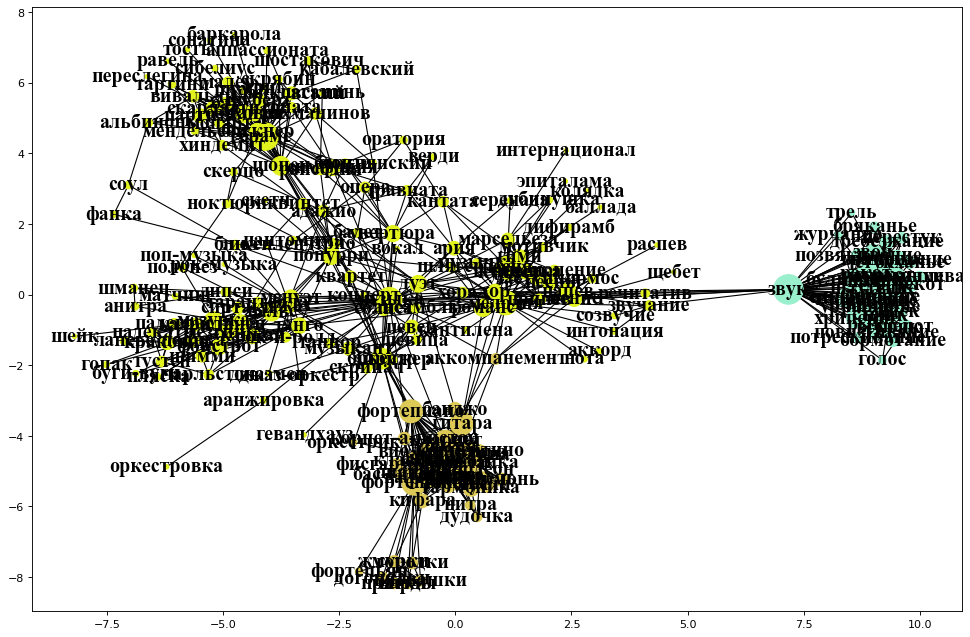

In [128]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

pos = nx.spring_layout(G, scale=10)

nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=18, font_family='Times New Roman')

plt.show()

In [137]:
for i in range(len(comms)):
    print('Сообщество ', i + 1, ': ', ', '.join(comms[i]), '\n', sep='')

Сообщество 1: адажио, аккорд, альбинонь, анитра, ансамбль, аппассионата, аранжировка, ария, балет, баллада, баркарола, бах, бетховен, блюз, бортнянский, брамс, брукнер, буги-вуги, вальс, верди, вивальди, вокал, гайдн, гевандхауз, гимн, гопак, григ, джаз, джаз-оркестр, джазмен, диксиленд, дирижер, дифирамб, дубинушка, дуэт, звучание, интернационал, интонация, ирмос, кабалевский, кадриль, канкан, кантата, кантилена, квартет, квинтет, колядка, концерт, краковяк, куплет, лансье, лезгинка, липси, мазурка, малер, марсельеза, матчиш, мелодия, мендельсон, менуэт, мотивчик, моцарт, музыка, музыкант, музычка, напев, ноктюрн, нота, опера, оратория, оркестр, оркестровка, паганинь, падеграс, падекатр, пантомима, партита, певец, певица, пение, переслегина, песенка, песнопение, песнь, песня, пляска, полонез, полька, поп-музыка, попурри, припев, равель, рапсодия, распев, рахманинов, речитатив, рок-музыка, рок-н-ролл, романс, серенада, сибелиус, симфония, сиртаки, скарлатти, скерцо, скетч, скрипач, скр

#### Интерпретация:

Первое сообщество похоже на кашу из всего, с чем алгоритм не справился, но на графике все же видны некоторые более-менее скучкованные части - композиторы (Брамс, Чайковский, Мендельсон, Григ, Бах, Бетховен...), танцы (сиртаки, гопак, танго...) и, кажется, что-то, относящееся к пению (хор, напев, романс, ария, вокал...)

Второе сообщество, в основном, состоит из музыкальных инструментов, к которым также приклеились разнообразные игры (вероятно, из-за контекстов с предикатом "играть"), однако немного отделившиеся от интрументов

Третье сообщество - это различные звуки совершенно разного происхождения и характера

#### Вычислите самые центральные узлы графа по degree centrality, betweenness centrality, closeness centrality и eigencentrality.

In [37]:
d = nx.degree_centrality(G)

print('Топ-10 центральных узлов по degree centrality:\n')

for v in sorted(d, key=d.get, reverse=True)[:10]:
    print(v, d[v])

Топ-10 центральных узлов по degree centrality:

звук 0.2088888888888889
брамс 0.17777777777777778
музыка 0.1511111111111111
скрипка 0.1511111111111111
фортепьяно 0.14222222222222222
мелодия 0.13777777777777778
гитара 0.13333333333333333
пыхтение 0.13333333333333333
сопение 0.1288888888888889
фортепиано 0.12444444444444444


In [38]:
d = nx.betweenness_centrality(G)

print('Топ-10 центральных узлов по betweenness centrality:\n')

for v in sorted(d, key=d.get, reverse=True)[:10]:
    print(v, d[v])

Топ-10 центральных узлов по betweenness centrality:

музыка 0.4791027238179825
звук 0.30845218407420166
брамс 0.20373814499190437
мелодия 0.14082161786369066
фортепьяно 0.10017946483698217
оркестр 0.08681645040156677
песня 0.06967256395677118
гитара 0.05862347298461271
лютня 0.056080762323873615
попурри 0.055204389454794146


In [39]:
d = nx.closeness_centrality(G)

print('Топ-10 центральных узлов по closeness centrality:\n')

for v in sorted(d, key=d.get, reverse=True)[:10]:
    print(v, d[v])

Топ-10 центральных узлов по closeness centrality:

музыка 0.5408653846153846
мелодия 0.4620123203285421
попурри 0.423728813559322
звук 0.42293233082706766
оркестр 0.4143646408839779
песня 0.41208791208791207
напев 0.41058394160583944
брамс 0.40834845735027225
пение 0.40540540540540543
фортепьяно 0.40394973070017953


In [43]:
d = nx.eigenvector_centrality_numpy(G)

print('Топ-10 центральных узлов по eigenvector centrality:\n')

for v in sorted(d, key=d.get, reverse=True)[:10]:
    print(v, d[v])

Топ-10 центральных узлов по eigen centrality:

звук 0.2851034271421283
пыхтение 0.2456311106616772
сопение 0.2342624141313395
гул 0.23030830137643046
гудение 0.2228272973938332
шипение 0.21264562594926792
шорох 0.2065560004486519
свист 0.20586627902558385
грохот 0.2058024698409038
рычание 0.19183266046442093


#### Вычислите плотность графа, его диаметр, радиус, коэффициент кластеризации и коэффициент ассортативности.

In [127]:
print('Плотность графа:', nx.density(G))

print('Диаметр:', nx.diameter(G))

print('Радиус:', nx.radius(G))

print('Коэффициент кластеризации:', nx.average_clustering(G))

print('Коэффициент ассортативности:', nx.degree_pearson_correlation_coefficient(G))

Плотность графа: 0.044483775811209436
Диаметр: 4
Радиус: 2
Коэффициент кластеризации: 0.5831461422774574
Коэффициент ассортативности: -0.013957866874832187
